<a href="https://colab.research.google.com/github/sachaslobs/BachelorThesis/blob/main/Final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import functions

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import PIL
import PIL.Image
import cv2
import os
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

setting variables

In [ ]:
#variables different models
batch_size1 = 6
batch_size2 = 9
batch_size3 = 12

epochs1 = 15
epochs2 = 20
epochs3 = 25

learn_rate1 = 0.001
learn_rate2 = 0.0005
learn_rate3 = 0.005

In [ ]:
#setting some variables for image rescaling and batch size
img_height = 200
img_width = 200
batch_size = batch_size2

# defining training and testing datasets

In [ ]:
#loading the images from desktop, defining which data is used for training and which is used for validation by using validation_split
#this defines the training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Thesis\\basedata_test1\\all_data",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

Found 320 files belonging to 2 classes.
Using 288 files for training.


In [ ]:
#this defines the validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Thesis\\basedata_test1\\all_data",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)

Found 320 files belonging to 2 classes.
Using 32 files for validation.


In [ ]:
#testing id class names are imported corectly
class_names = train_ds.class_names
print(class_names)

['no_roadside_vegetation', 'roadside_vegetation']


# rescaling, prefetching & data augmentation

In [ ]:
#using rescaling function to change all rgb values from values between [0, 255] to values between [0,1]. Tnis is done because smaller values are more ideal for training you neural network.
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#using buffered prefetching to yield data from the disk without having I/O becoming blocking
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# defining and compiling model

In [ ]:

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(32, (3,3),activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D(2,2),
  #layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learn_rate2),
              metrics=['acc'])

# training model

In [ ]:
epochs= epochs3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.save('exp17.model')

Epoch 1/25
32/32 [==============================] - 8s 264ms/step - loss: 0.9380 - acc: 0.5556 - val_loss: 0.6912 - val_acc: 0.4688
Epoch 2/25
32/32 [==============================] - 9s 269ms/step - loss: 0.6684 - acc: 0.6076 - val_loss: 0.6724 - val_acc: 0.5000
Epoch 3/25
32/32 [==============================] - 9s 269ms/step - loss: 0.6312 - acc: 0.6910 - val_loss: 0.6090 - val_acc: 0.6562
Epoch 4/25
32/32 [==============================] - 7s 234ms/step - loss: 0.5553 - acc: 0.7500 - val_loss: 0.5105 - val_acc: 0.8125
Epoch 5/25
32/32 [==============================] - 8s 244ms/step - loss: 0.4963 - acc: 0.8021 - val_loss: 0.4905 - val_acc: 0.8438
Epoch 6/25
32/32 [==============================] - 8s 258ms/step - loss: 0.4421 - acc: 0.8021 - val_loss: 0.4516 - val_acc: 0.8438
Epoch 7/25
32/32 [==============================] - 7s 234ms/step - loss: 0.4158 - acc: 0.8333 - val_loss: 0.4382 - val_acc: 0.7812
Epoch 8/25
32/32 [==============================] - 8s 235ms/step - loss: 0.

In [ ]:
#model.summary()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)       

# model visualization

Text(0.5, 1.0, 'Training and validation loss')

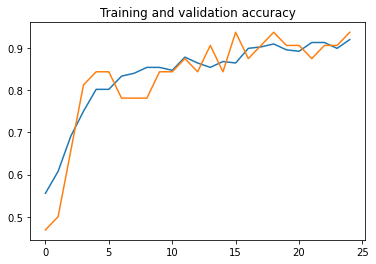

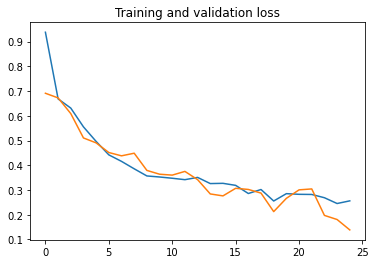

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

Examples of images from training dataset with corresponding labels

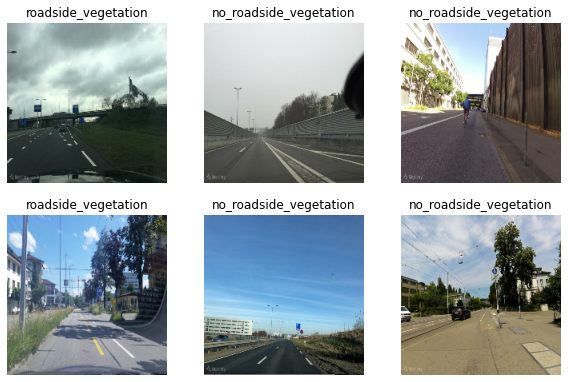

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# using model to predict on new images

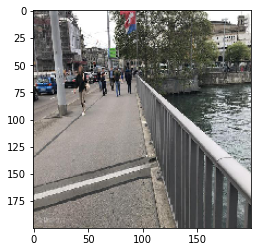

This is the prediction: 
[[0.00414574]]
It means that there is NO  clear vegetation in the image


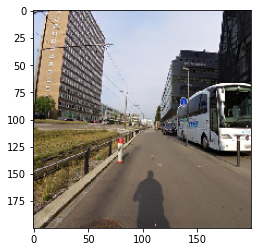

This is the prediction: 
[[0.00063232]]
It means that there is NO  clear vegetation in the image


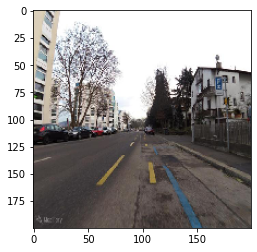

This is the prediction: 
[[0.03037417]]
It means that there is NO  clear vegetation in the image


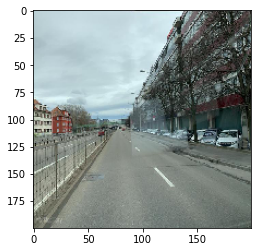

This is the prediction: 
[[0.06107864]]
It means that there is NO  clear vegetation in the image


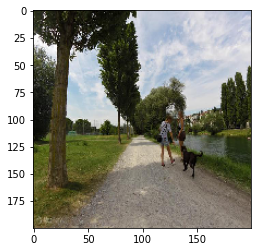

This is the prediction: 
[[0.99790543]]
It means that there is vegetation in the image


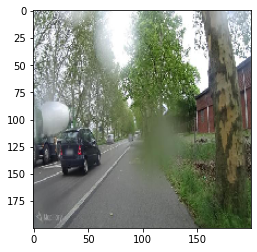

This is the prediction: 
[[0.9687512]]
It means that there is vegetation in the image


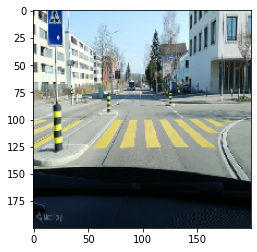

This is the prediction: 
[[0.01649725]]
It means that there is NO  clear vegetation in the image


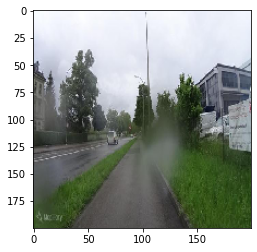

This is the prediction: 
[[0.9999995]]
It means that there is vegetation in the image


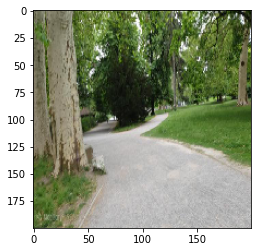

This is the prediction: 
[[0.99999416]]
It means that there is vegetation in the image


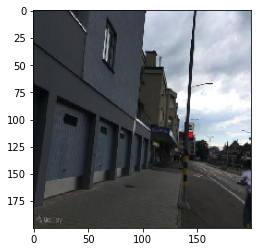

This is the prediction: 
[[0.05408818]]
It means that there is NO  clear vegetation in the image


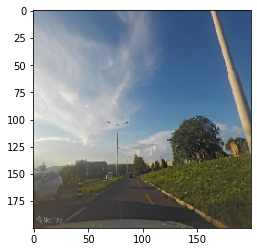

This is the prediction: 
[[0.9492446]]
It means that there is vegetation in the image


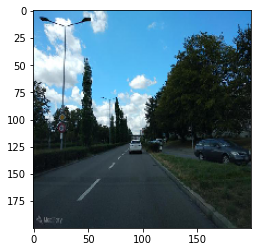

This is the prediction: 
[[0.00332206]]
It means that there is NO  clear vegetation in the image


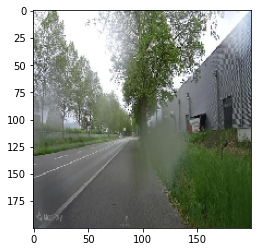

This is the prediction: 
[[0.9998822]]
It means that there is vegetation in the image


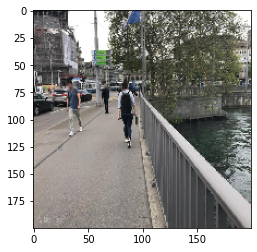

This is the prediction: 
[[0.01530236]]
It means that there is NO  clear vegetation in the image


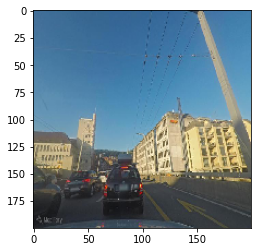

This is the prediction: 
[[0.3729936]]
It means that there is NO  clear vegetation in the image


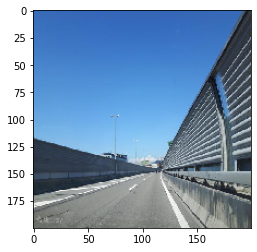

This is the prediction: 
[[0.03247556]]
It means that there is NO  clear vegetation in the image


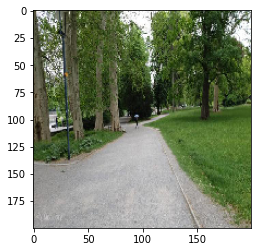

This is the prediction: 
[[1.]]
It means that there is vegetation in the image


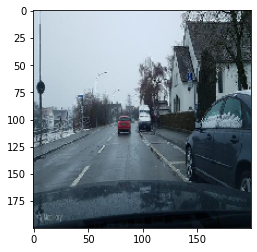

This is the prediction: 
[[0.04530475]]
It means that there is NO  clear vegetation in the image


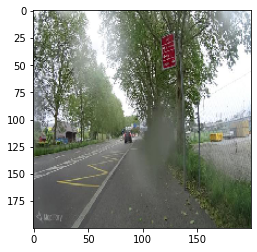

This is the prediction: 
[[0.9738938]]
It means that there is vegetation in the image


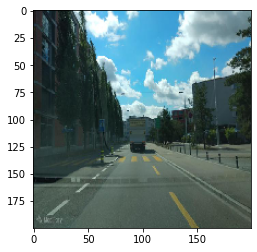

This is the prediction: 
[[0.01703796]]
It means that there is NO  clear vegetation in the image


In [ ]:
dir_path = "C:\\Thesis\\images_vol_6\\data\\zurich\\predict map"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"//"+i, target_size=(img_height, img_width))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images)
    
    if pred > 0.5:
        print('This is the prediction: ')
        print(pred)
        print('It means that there is vegetation in the image')
    else:
        print('This is the prediction: ')
        print(pred)
        print('It means that there is NO  clear vegetation in the image')